

#**1. The 'Adult' dataset**:
Importing the data:



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

#opening the adult dataset
# Note: header=None prevents that the first entry is automatically registered as the column names
df=pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

#Manually inserting what each column represents (according to adult.names file)
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#**Data Analysis and Preprocessing**



In [ ]:
#Divide data into input (X) and outcome (y)
X=df.drop('income',1)
y=[0 if i== ' <=50K' else 1 for i in df['income']]

In [ ]:
# Creating a list of columns with categorical data and a list with numerical data:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

obj_c = object_cols(df)
num_c = numerical_cols(df)

In [ ]:
#Analysing the dataset
num_c

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

**NUMERICAL FEATURES**

The following preprocessing options were tested on the data, and the one which transformed the data to fit most a normal distribution was also applied.

>StandardScaler: Standardize features by removing the mean and scaling to unit variance; cannot guarantee balanced feature scales in the presence of outliers.


>RobustScaler: removes the median and scales the data according to the quantile range, robust to outliers

>PowerTransformer: Apply a power transform featurewise to make data more Gaussian-like.  This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. By default, zero-mean, unit-variance normalization is applied.
>>Box-Cox transform: requires input data to be strictly positive. Default (for λ=0) Box-Cox is the logarithmic function.\
>>Yeo-Johnson transform (default): supports both positive or negative data.

For heavily right skewd data (columns capital-gain and capital-loss) the following transformations were also tested: \
>square root \
>log (unpractical if there are values equal to zero; solution: add a very small constant c=0.1) \
>sinh 

None of these transformations resulted in a satisfactory data, thus capital-gain and capital-loss have been merged into net-capital,which resembled more a normal distribution.


In [ ]:
#A function used to describing data
def describe (data):
  print ('Characteristics:\nmean {} \nmedian {} \nskewness {} \nstand. deviation {}'.format(np.mean(data), np.median(data), scipy.stats.skew(data), np.std(data)))


#################################################################################################
#Function 'trans' applies the above mentioned transformations of the data and shows a visualisation of the result.
# The visualisations have been commented out after the appropiate transformation was chosen for each feature.
def transf (data):
  t = np.asarray(data)
  t = t.reshape(-1,1)

  #Standard
  tss=StandardScaler().fit_transform(t)
  print ('Standard Scaler:')
  describe(tss)
  #sns.histplot(data=tss).set(title = 'Standard')
  #plt.show()
  
  #Robust 
  trs=RobustScaler().fit_transform(t)
  print ('\nRobust Scaler:')
  describe(trs)
  #sns.histplot(data=trs).set(title = 'Robust')
  #plt.show()

  #Boxcox 
  if (np.min(data)>0):
    tboxcox=PowerTransformer(method='box-cox').fit_transform(t)
    print ('\nBox-Cox Transformation:')
    describe(tboxcox)
    #sns.histplot(data=tboxcox).set(title = 'Box-Cox')
    #plt.show()
  else: 
    print('\nBox-Cox cannot be performed (data is not strictly positive)\n\n')
    tboxcox=0

  #Yeo-Johnson
  tyeojohn=PowerTransformer(method='yeo-johnson').fit_transform(t)
  print ('\nYeo-Johnson Transformation:')
  describe(tyeojohn)
  #sns.histplot(tyeojohn).set(title = 'Yeo-Johnson') #COMMENT: for this data the output is similar to Box-Cox
  #plt.show()

  return (tss, trs, tboxcox,tyeojohn)
#
#
#
#
###############################################################################################
def yeojohn(data):  #only the yeojohn transformation; 
  t = np.asarray(data)
  t = t.reshape(-1,1)
  tyeojohn=PowerTransformer(method='yeo-johnson').fit_transform(t)
  return tyeojohn

#
#
#
#
#################################################################################################################
def hrskew(data):  ##all transformations that have been tested on the features with a very proeminent right skew
  #Square Root (only non-negative data)
  if np.min(data)>=0:
    tsqrt=np.sqrt(data)
    print ('Square Root Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tsqrt), np.median(tsqrt), scipy.stats.skew(tsqrt)))
    sns.histplot(tsqrt).set(title = 'Square Root')
    plt.show()
  else:
    print ('Square root not possible due to negative values')
    tsqrt=0

  #Logarithmic function (only strictly positive data)
  if np.min(data)>0:
    tlog=np.log(data)
    print ('Log Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tlog), np.median(tlog), scipy.stats.skew(tlog)))
    sns.histplot(tlog).set(title = 'Logarithmic')
    plt.show()
  else:
    print ('SLogarithmic transformation not possible due to negative values or zeros')
    tlog=0

  #Logarithmic function plus constant (to avoid zeros)
  c=0.1
  if np.min(data)+c>0:
    tlog2=np.log(data+c)
    print ('Log(data+0.1):\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tlog2), np.median(tlog2), scipy.stats.skew(tlog2)))
    sns.histplot(tlog2).set(title = 'Logarithmic with constant')
    plt.show()
  else:
    print ('Logarithmic transformation (plus constant) not possible due to negative values')
    tlog2=0

  #Sinh transformation (overflow for big values, since it implies e^x)
  if np.max(data)<=40:
    tsinh=np.sinh(data)
    print ('Hyperbolic Sine Transformation:\n mean {} \nmedian {} \nskewness {}'.format(np.mean(tsinh), np.median(tsinh), scipy.stats.skew(tsinh)))
    sns.histplot(tsinh).set(title = 'Hyperbolic sine')
    plt.show()
  else:
    print ('Sinh function not possible, data too large')
    tsinh=0

  return (tsqrt, tlog, tlog2, tsinh)


####################################################################################
  def percentage (data): #used to calculate the distribution of the income in relation to certain features
    return len(data[data.income==' >50K'])/len(data)


>>**Feature: AGE**

Characteristics:
mean 38.58164675532078 
median 37.0 
skewness 0.5587176292398571 
stand. deviation 13.640223092304081


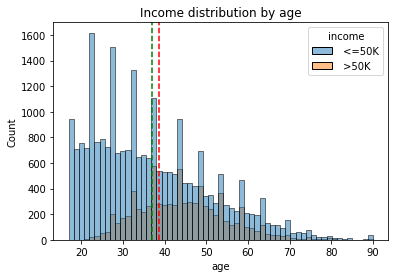

In [ ]:
describe (df.age)  #skewness accepted for this project: max 0.8

sns.histplot(data=df, x='age', hue='income').set(title = 'Income distribution by age')

plt.axvline(df['age'].mean(), color='r', linestyle='--')
plt.axvline(df['age'].median(), color='g', linestyle='--')
plt.show()

Standard Scaler:
Characteristics:
mean -2.7059150282317012e-17 
median -0.11595461046477588 
skewness [0.55871763] 
stand. deviation 1.0

Robust Scaler:
Characteristics:
mean 0.07908233776603912 
median 0.0 
skewness [0.55871763] 
stand. deviation 0.6820111546152138

Box-Cox Transformation:
Characteristics:
mean -2.2714410910374013e-15 
median 0.02859890439374671 
skewness [-0.01612141] 
stand. deviation 1.0

Yeo-Johnson Transformation:
Characteristics:
mean 1.5275326772275733e-16 
median 0.028013720487216634 
skewness [-0.01389758] 
stand. deviation 1.0


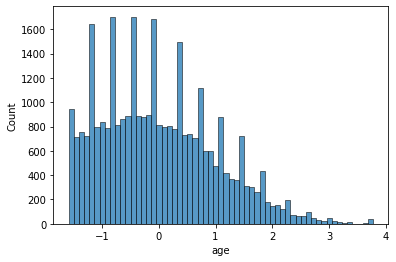

In [ ]:
###Transformation of age data

agess, agers, ageboxcox, ageyeojohn = transf(df.age) 

#Selected transformation: Standard Scaler

X.age=agess
sns.histplot(data=X.age)

>>**Feature: FNLWGT**

In [ ]:
#FNLWGT

# this is the number of people the census believes the entry represents
# no real informational value
# no need to be used
del X['fnlwgt']

>>**Feature: CAPITAL-GAIN**






Characteristics:
mean 1077.6488437087312 
median 0.0 
skewness 11.953296998194332 
stand. deviation 7385.178676946586


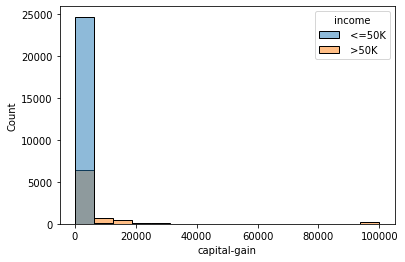

In [ ]:
describe(df['capital-gain'])
sns.histplot(data=df, x='capital-gain', hue='income')
plt.show()

In [ ]:
#Transformation of Capital-Gain

#cg_tss, cg_trs, cg_boxcox, cg_yeojohn = transf(df['capital-gain'])

In [ ]:
#None of the previous transformations reduce the skew to an acceptable value (below 0.5)

#cg_sqrt, cg_log, cg_log2, cg_sinh=hrskew(df['capital-gain'])

>>**Feature: CAPITAL-LOSS**


Characteristics:
mean 87.303829734959 
median 0.0 
skewness 4.59441745643977 
stand. deviation 402.9540308275458


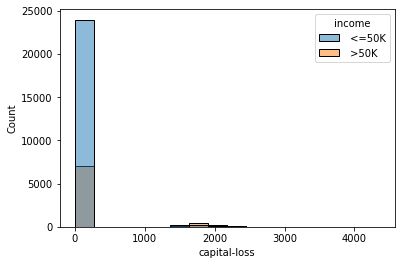

In [ ]:
describe(df['capital-loss'])
# using a logarithmic scale
capl_plot = sns.histplot(data=df, x='capital-loss', hue='income')
#capl_plot.set_yscale('log')

In [ ]:
#Transformation of Capital-Loss
#cl_tss, cl_trs, cl_boxcox, cl_yeojohn = transf(df['capital-loss'])

In [ ]:
# Due to high right skewness, we also apply sqroot, log and sinh
#cl_sqrt, cl_log, cl_log2, cl_sinh=hrskew(df['capital-loss'])

Due to the high right skewness of features 'capitaal-gain' and 'capital-loss', which could not be corrected even after all the above mencioned transformation, these features were deemed unusable for our classifiers. Nontheless, we merged them (by substraction) into a new feature 'net-capital' which, after undergoing a yeo-johnson transformation, was selected to be further used, as it fits a normal distribution.

In [ ]:
#Capital0gain and Capital-loss cannot be user per se in the classification.
#Creating a new feature:

df['net-capital']=df['capital-gain']-df['capital-loss']
describe(df['net-capital'])
#nc_ss, nc_rs, nc_boxcox, nc_yeojohn=transf(df['net-capital'])
#nc_sqrt, nc_log, nc_log2, nc_sinh=hrskew(df['net-capital'])

Characteristics:
mean 990.3450139737723 
median 0.0 
skewness 11.87138700308005 
stand. deviation 7408.8731790828


Characteristics:
mean -8.748056894320749e-16 
median 0.04477222863299982 
skewness 0.798720544761661 
stand. deviation 1.0000000000001912


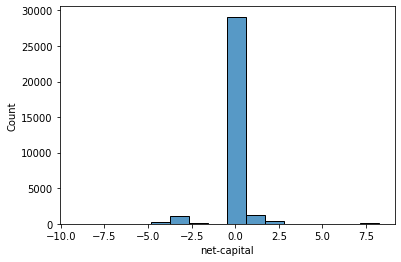

In [ ]:
del X['capital-gain']
del X['capital-loss']
X['net-capital']=yeojohn(df['net-capital'])
describe (X['net-capital'])
sns.histplot(data=X['net-capital'])

>>**Feature: Hours per week**



Characteristics:
mean 40.437455852092995 
median 40.0 
skewness 0.227632049774777 
stand. deviation 12.347239075706955


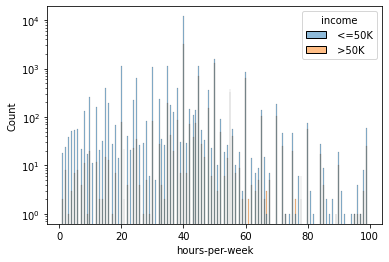

In [ ]:
describe(df['hours-per-week'])
sns.histplot(data=df, x='hours-per-week', hue='income').set_yscale('log')
plt.show()

In [ ]:
from scipy.stats import kurtosis #since the data has (visually) a very sharp peak, we are interested in its kurtosis
print('Kurtosis is: ', kurtosis(df['hours-per-week']), 'thus the data is mesokurtic.\n Skewness<1. \n This data is sufficiently similar to a gaussian distribution and thus does not need a transformation.')
print('The range of values within the data is:', np.max(df['hours-per-week'])-np.min(df['hours-per-week']), 'needs scaling.')

hpw_ss, hpw_rs, hpw_bpxcpx, hpw_yeojohn=transf(df['hours-per-week'])

X['hours-per-week']=hpw_ss

Kurtosis is:  2.9160546709844883 thus the data is mesokurtic.
 Skewness<1. 
 This data is sufficiently similar to a gaussian distribution and thus does not need a transformation.
The range of values within the data is: 98 needs scaling.
Standard Scaler:
Characteristics:
mean -1.5493545726165386e-17 
median -0.03542944697277691 
skewness [0.22763205] 
stand. deviation 0.9999999999999999

Robust Scaler:
Characteristics:
mean 0.08749117041859895 
median 0.0 
skewness [0.22763205] 
stand. deviation 2.4694478151415975

Box-Cox Transformation:
Characteristics:
mean -4.720075972633201e-16 
median -0.03568063895386623 
skewness [0.23107916] 
stand. deviation 1.0

Yeo-Johnson Transformation:
Characteristics:
mean -9.994428088146123e-17 
median -0.035570102812165307 
skewness [0.22956106] 
stand. deviation 1.0


**CATEGORICAL FEATURES**

Goals:
*   One-Hot-Encoder for all categorical features selected
*   Reduction of features by merging categories into logical subgroups




In [ ]:
#Deciding which data to use in the model
for i in obj_c:
  unique=len(df[i].unique())
  print ('Feature {feature}'.format(feature=i), 'has %u unique categories' %(unique))

Feature workclass has 9 unique categories
Feature education has 16 unique categories
Feature marital-status has 7 unique categories
Feature occupation has 15 unique categories
Feature relationship has 6 unique categories
Feature race has 5 unique categories
Feature sex has 2 unique categories
Feature native-country has 42 unique categories
Feature income has 2 unique categories


>>**Feature: WORKCLASS**

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

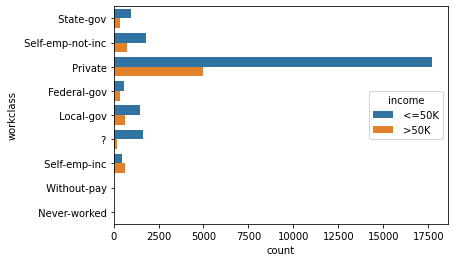

In [ ]:
# Analysing feature workclass

cp = sns.countplot(data=df, y='workclass', hue='income')
df.workclass.value_counts()

After feature selection:
---------------------



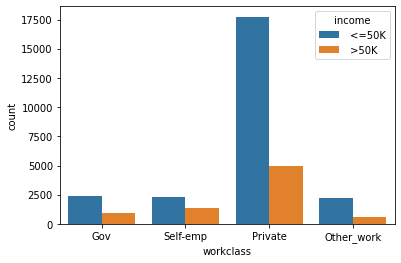

In [ ]:
#Separating feature 'workclass' into 4 categories:
#
#'Private','Gov', 'Self-employed and 'Other'
#
X['workclass']=['Private' if (i == ' Private')
else 'Self-emp' if (i== ' Self-emp-inc' or i== ' Self-emp-not-inc') 
else 'Gov' if (i == ' Local-gov' or i== ' State-gov' or i== 'Federal-gov') 
else 'Other_work' for i in df['workclass']]

dummy=pd.get_dummies(X.workclass)
X=pd.concat([X, dummy], axis=1)
print ('After feature selection:\n---------------------\n')
cp = sns.countplot(data=X, x='workclass', hue=df.income)
X.workclass.value_counts()
del X['workclass']

>>**Feature: EDUCATION**

In [ ]:
# Analysing feature education - commented out, since education-num can be used instead
del X['education']

>>**Feature: EDUCATION-NUM**


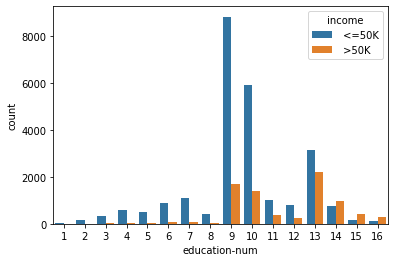

In [ ]:
# education-num is just the nominal variable education converted to numbers instead of text, thus it shall be treated as an ordinal categorical value
edu_plot = sns.countplot(data=df, x='education-num', hue='income')#.set(title = 'Income distribution by degree')

#edu_plot.set_yscale('log') COMMENT: attemting to normalize this data makes sense if we assume that the peak of the curve land on numbers 8 (meaning: finished 12th grade) or 9 (meaning: finished highscool) 
#                                    with equal deviations of both sides, which would imply an aprox 50% fail at finishing high school in the population, which seems unreasonable



>>**Feature OCCUPATION**


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

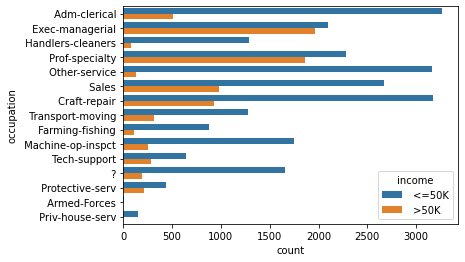

In [ ]:
#Plotting feature occupation
op = sns.countplot(data=df, y='occupation', hue='income')
df['occupation'].value_counts()

**Preprocessing feature 'occupation'**

This feature has 15 unique categories. We will try a reduction in categories by separating occupations into fewer classes:

* **class 'BlueCollar'**: occupations: Craft-repair, Farming-fishing, Handlers-cleaners, Machine-op-inspct.

Blue Collar jobs *may involve manufacturing, warehousing, mining, excavation, electricity generation and power plant operations,electrical construction and maintenance, custodial work, farming, commercial fishing, logging, landscaping, pest control, food processing, oil field work, waste collection and disposal, recycling, construction, maintenance. This does exclude driving, trucking and many other types of physical work.* (Source:Wikipedia)

* **class 'WhiteCollar'**: occupations: Exec-managerial, Adm-clerical, Prof-specialty

White-collar workers *include job paths related to government, consulting, academia, accountancy, business and executive management, 
              customer support, design, engineering, market research, finance, human resources, operations research, marketing, information technology, 
              networking, law, healthcare, architecture, and research and development.* (Source:Wikipedia)

* **class 'Services'**: occupations: Protective-Serv, Tech-Support,  Other-service, Priv-house-serv, Transport-moving


* **class 'Other_occupation'**: occupations: '?', Armed-Forces, Sales

After feature selection:
---------------------



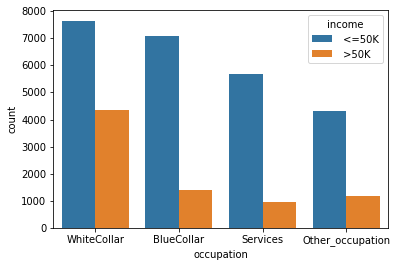

In [ ]:


X['occupation']=['BlueCollar' if (i == ' Craft-repair' or i == ' Farming-fishing' or i == ' Handlers-cleaners' or i == ' Machine-op-inspct')
else 'WhiteCollar' if (i==' Exec-managerial' or i==' Adm-clerical' or i==' Prof-specialty')
else 'Other_occupation' if (i==' ?' or i ==' Armed-Forces' or i==' Sales')
else 'Services' for i in df['occupation']]

dummy=pd.get_dummies(X.occupation)
X=pd.concat([X, dummy], axis=1)
print ('After feature selection:\n---------------------\n')
cp = sns.countplot(data=X, x='occupation', hue=df.income)
X.occupation.value_counts()
del X['occupation']

>>**Feature Native Country**


---------------------
After feature selection:
United-States    29170
Other_country     3391
Name: native-country, dtype: int64


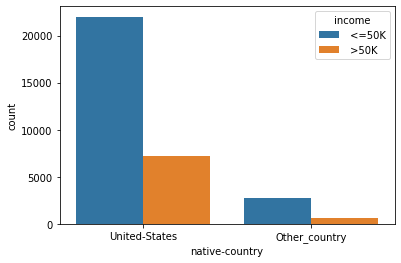

In [ ]:
# Analysing feature 'native-country'
# 'United-States' accounts for 89.5% of the features, the rest 10.5% representing the other 41 features

# Separating feature 'native country' into 'United-States' and 'Other'

X['native-country']=['United-States' if i == ' United-States' else 'Other_country' for i in df['native-country']]

print ('\n---------------------\nAfter feature selection:')
print (X['native-country'].value_counts())

dummy  =pd.get_dummies(X['native-country'])
X = pd.concat([X, dummy], axis=1)

cp = sns.countplot(data=X, x='native-country', hue=df.income)
del X['native-country']

>>**Features: Marital status, Relationship, Race, Sex**

**Protected attributes**

After feature selection:
---------------------



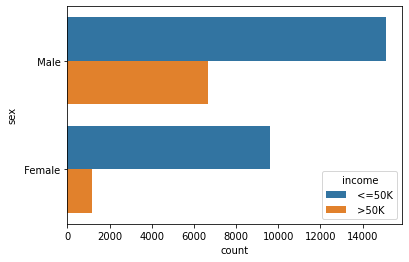

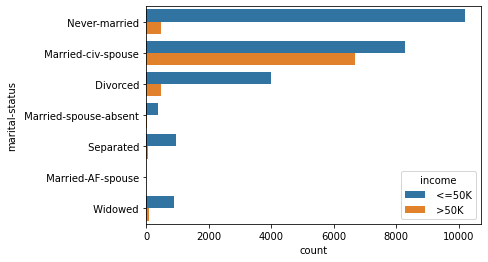

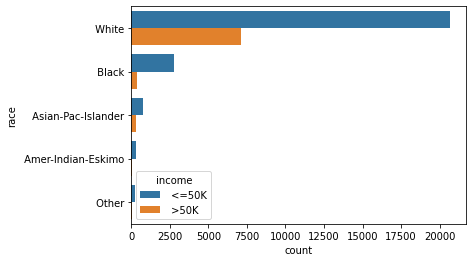

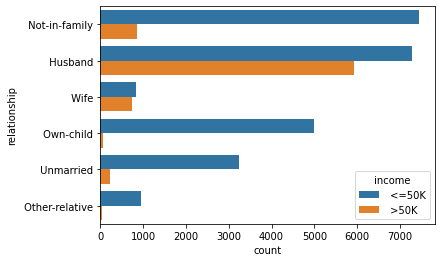

NP    17562
WP    14999
Name: marital-status, dtype: int64
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


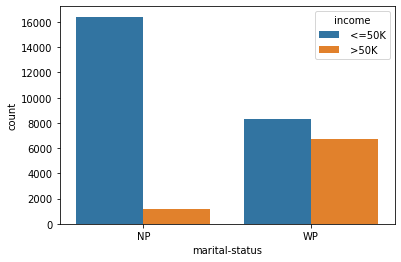

In [ ]:
protected=list() #list of protected attributes

print ('After feature selection:\n---------------------\n')
for i in ['sex','marital-status','race','relationship']:
  sns.countplot(data=df, y=i, hue=df.income)
  plt.show()

# Analizing feature 'marital status' ----------   Regrouping the feature into:
#with-partner ('WP'):  Married-civ-spouse,  Married-AF-spouse 
#no-partner ('NP): Never-married, Divorced, Separated, Widowed, Married-spouse-absent

#print (df['marital-status'].value_counts())
X['marital-status']=['WP' if (i == ' Married-civ-spouse' or i == ' Married-AF-spouse')
else 'NP' for i in df['marital-status']]
print (X['marital-status'].value_counts())
sns.countplot(data=X, x='marital-status', hue=df.income)
dummy=pd.get_dummies(X['marital-status'])
X=pd.concat([X, dummy], axis=1)
del X['marital-status']
protected.append('NP')
protected.append('WP')

# Analizing feature 'relationship' ------------- 
# Inspecting the histogram, it would make sense to group 'Husband' and 'Wife' together into 'Spouse' and the rest into 'Family-not-spouse',
#but it will definitely correlate with the feature 'marital-status'. Thus 'relationship' will be excluded from the features.
del X['relationship']

# Analizing feature 'race' 
print (df['race'].value_counts())
X['race']=['Other_race' if (i==' Other') else i for i in X.race]
dummy=pd.get_dummies(X.race)
X = pd.concat([X, dummy], axis=1)
del X['race']
protected.append('Other_race')
protected.append('White')
protected.append('Black')
protected.append('Asian-Pac-Islander')
protected.append('Amer-Indian-Eskimo')

# Analizing feature 'sex'
#print (df['sex'].value_counts())
dummy=pd.get_dummies(X.sex)
X = pd.concat([X, dummy], axis=1)
del X['sex']
protected.append('Female')
protected.append('Male')

In [ ]:
#Attributes describing X: list of numerical columns (list_num), list of binary columns (list_bin)
list_num=['age','education-num','net-capital', 'hours-per-week']
list_bin=[]
#Columns of X (checking the results of dummy function)
for i in X.columns:
  if i[0]==' ': #removing the space at the beginning of some of the column names
    X.rename(columns={i : i.replace(" ", "")}, inplace=True)
    print (i[1:])
    if (i not in list_num): list_bin.append(i[1:])
  else: 
    print (i)
    if (i not in list_num): list_bin.append(i)

print ('A total of ', X.shape[1], 'features')
print (list_bin)

age
education-num
hours-per-week
net-capital
Gov
Other_work
Private
Self-emp
BlueCollar
Other_occupation
Services
WhiteCollar
Other_country
United-States
NP
WP
Amer-Indian-Eskimo
Asian-Pac-Islander
Black
White
Other_race
Female
Male
A total of  23 features
['Gov', 'Other_work', 'Private', 'Self-emp', 'BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar', 'Other_country', 'United-States', 'NP', 'WP', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race', 'Female', 'Male']


 <=50K    24720
 >50K      7841
Name: income, dtype: int64

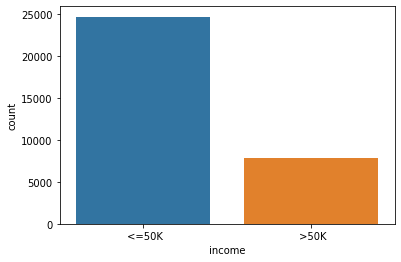

In [ ]:
#Income 

# showing distribution of income
# The label 'income' is very imbalanced, which could potentially affect the accuracy of the classifiers.

sns.countplot(data=df, x='income')
df['income'].value_counts()

> ● Bivariate analysis 

In what follows, a correlation matrix for the numerical values will be plotted, as well as a heatmap showing the Jaccard coefficient between the binomial features.

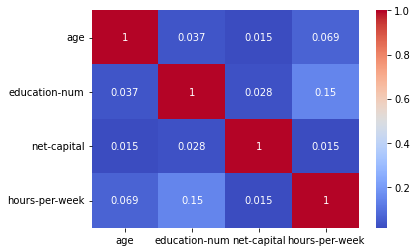

In [ ]:
# corelation matrix
corr_matrix = X.loc[:,list_num].corr()
corr_matrix

# alternative to corr_matrix: just use df.corr() and it will pick numerical values automatically. annot= for numbers, cmap= for colors
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


Computing correlations between  occupation  and  workclass

Computing correlations between  occupation  and  native-country

Computing correlations between  occupation  and  race

Computing correlations between  occupation  and  sex

Computing correlations between  occupation  and  marital

Computing correlations between  workclass  and  native-country

Computing correlations between  workclass  and  race

Computing correlations between  workclass  and  sex

Computing correlations between  workclass  and  marital

Computing correlations between  native-country  and  race

Computing correlations between  native-country  and  sex

Computing correlations between  native-country  and  marital

Computing correlations between  race  and  sex

Computing correlations between  race  and  marital

Computing correlations between  sex  and  marital


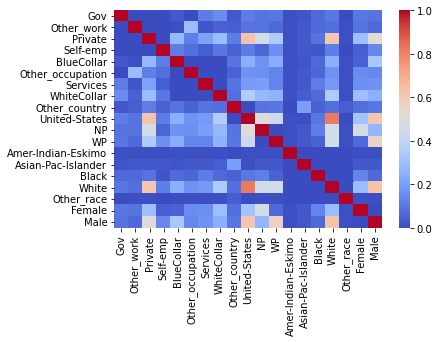

In [ ]:
#Printing a heatmap showing the jaccard coefficients between the columns of binary features in X:

#1. defining jaccard coefficient
def jaccard_coef (v1, v2):
    rs=0 # = r + s
    q=0
    for x,y in zip(v1,v2):
        if (x!=y): rs=rs+1
        if (x)&(y): q=q+1
    #smc=round(rs/(q+rs),2) #similarity coefficient rounded to 2 decimals
    jc=round(q/(q+rs),2) #jaccard coeficient rounded to 2 decimals
    return jc 

#2. Building lists of columns to analyse:
#print (list_bin) #OUT: ['Gov', 'Other_work', 'Private', 'Self-emp', 'BlueCollar', 'Other_occupation', 'Services', 
#                       'WhiteCollar', 'Other_country', 'United-States', 'NP', 'WP', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 
#                        'Black', 'White', 'Other_race', 'Female', 'Male']

occupation=list_bin[0:4] #Values: ['Gov', 'Other_work', 'Private', 'Self-emp']
workclass=list_bin[4:8]  #Values: ['BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar']
country=list_bin[8:10]   #Values: ['Other_country', 'United-States']
marital=list_bin[10:12]  #Values: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race']
race=list_bin[12:17]     #Values: ['Female', 'Male']
sex=list_bin[17:19]      #Values: ['NP', 'WP']
list2=[occupation, workclass, country, race, sex, marital]
#List2 is a list of lists; 
#Reason: it makes no sense to check for correlation amongst different binary columns pertaining to the same feature, such as Other_Country vs United-States
#Example: list2[0] = occupation = ['Gov', 'Other_work', 'Private', 'Self-emp']
names=['occupation', 'workclass', 'native-country', 'race', 'sex', 'marital']


#3. Building up an array of results:
data=np.zeros([19,19])
results=pd.DataFrame(data=data, columns=list_bin)
results.index=list_bin
#results.head(10)


corr=[]
for i in range(len(list2)):     #example: in the first iteration i = occupation
  for j in range(len(list2)-i-1): #example: in the first iteraion of i, j takes the values: workclass, country, marital, race and sex
    correlation=False #We assume that the features are independent
    print ('\nComputing correlations between ',names[i],' and ', names[j+1+i])
    for v1 in list2[i]:  #example: in the first iteration of i, v1 takes the values 'Gov', 'Other_work', 'Private', 'Self-emp'
        for v2 in list2[j+i+1]:
          results[v1].loc[v2]= jaccard_coef(X[v1],X[v2])
          results[v2].loc[v1]= jaccard_coef(X[v1],X[v2]) #Due to simmetry

#Adding jaccard coef = 1 on the diagonal:
for i in list_bin:  #example: in the first iteration of i, v1 takes the values 'Gov', 'Other_work', 'Private', 'Self-emp'
      results[i].loc[i]=1 

sns.heatmap(results, cmap="coolwarm")

In [ ]:
for i in range(len(list2)):
  print (list2[i])

['Gov', 'Other_work', 'Private', 'Self-emp']
['BlueCollar', 'Other_occupation', 'Services', 'WhiteCollar']
['Other_country', 'United-States']
['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other_race']
['Female', 'Male']
['NP', 'WP']


In [ ]:
# Examine changes from original data set
print(df.shape)
print(X.shape)

(32561, 16)
(32561, 23)


#CLASSIFIERS

In [ ]:
# Use train_test_split to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [ ]:
# define function to make sure the same data set is used for all classifiers
# used for all classifiers except perceptron
def customfit(clf):
  clf.fit(X_train, y_train)
  return clf.predict(X_test)

In [ ]:
# import methods for performance evaluation
from sklearn.metrics import classification_report

# create list for an overview of the performance values
performance = list()

In [ ]:
# Importing libraries for k-fold cross validation
# https://www.statology.org/k-fold-cross-validation-in-python/
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# functions to evaluate cross validation
from numpy import mean
from numpy import absolute

# creating cross validation method
# random_state uses an integer to keep randomization consistent between runs. 42 is chosen arbitrarily. Testing other integers is useful
crossval = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# function for scores of classifiers
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, balanced_accuracy_score, recall_score, f1_score #, specificity_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

def scoring(y_testing):
  # accuracy
  print(f'Accuracy: {round(accuracy_score(y_test, y_testing), 2)}')
  # balanced accuracy
  print(f'Balanced Accuracy: {round(balanced_accuracy_score(y_test, y_testing), 2)}')
  # specificity: issues with import
  #print(f'Specificity: {round(specificity_score(y_test, y_testing), 2)}')
  # sensitivity. recall is used as it is the same as sensitivity
  print(f'Sensitivity: {round(recall_score(y_test, y_testing), 2)}')
  # f1 score
  print(f'F1 score: {round(f1_score(y_test, y_testing), 2)}')

def plotAUCROC(clf, X, y):
  # AUC is given in the graph
  # ROC
  plot_roc_curve(clf, X, y)
  plot_confusion_matrix(clf, X, y)

#1. KNN


##1.1. KNN: Finding best parameters

In [ ]:
#kNN

from sklearn.neighbors import KNeighborsClassifier

#Testing parameters:
# k - number of neighbours to be tested: 1, 5, 10, 15, 20
# metrics to be tested: 'euclidean','manhattan' 'chebyshev','minkowski'
#metrics=['euclidean','manhattan','chebyshev','minkowski'] ##commented out to reduce runtime; these param. did not produce better accuracy
metrics=['euclidean','manhattan']

def custom_knn(k, met):
  c_knn=KNeighborsClassifier(n_neighbors=k, metric=met)
  y_pred = customfit(c_knn)
  score_c_KNN_train = c_knn.score(X_train, y_train)
  score_c_KNN_test = c_knn.score(X_test, y_test)
  print(f'   Accuracy for KNN: training set {round(score_c_KNN_train, 2)}')
  print(f'   Accuracy for KNN: test set {round(score_c_KNN_test, 2)}')

distances=[]
for i in [1, 5, 6, 7, 10, 15, 20]:
  print ('\nComputing knn accuracy for for k=',i)
  for j in metrics:
    print (' Testig with metric=', j)
    custom_knn(i,j)


Computing knn accuracy for for k= 1
 Testig with metric= euclidean
   Accuracy for KNN: training set 0.96
   Accuracy for KNN: test set 0.81
 Testig with metric= manhattan
   Accuracy for KNN: training set 0.96
   Accuracy for KNN: test set 0.81

Computing knn accuracy for for k= 5
 Testig with metric= euclidean
   Accuracy for KNN: training set 0.88
   Accuracy for KNN: test set 0.84
 Testig with metric= manhattan
   Accuracy for KNN: training set 0.88
   Accuracy for KNN: test set 0.83

Computing knn accuracy for for k= 6
 Testig with metric= euclidean
   Accuracy for KNN: training set 0.87
   Accuracy for KNN: test set 0.84
 Testig with metric= manhattan
   Accuracy for KNN: training set 0.87
   Accuracy for KNN: test set 0.84

Computing knn accuracy for for k= 7
 Testig with metric= euclidean
   Accuracy for KNN: training set 0.87
   Accuracy for KNN: test set 0.84
 Testig with metric= manhattan
   Accuracy for KNN: training set 0.87
   Accuracy for KNN: test set 0.84

Computing k

##1.2. KNN: Defining the classifier 

In [ ]:
# Defining kNN with best accuracy
kNNclf = KNeighborsClassifier(metric='euclidean',n_neighbors=5)
y_pred_kNN = customfit(kNNclf)

# clf.score() automatically calulcates accuracy score based on classifier and test sets
score_kNN = kNNclf.score(X_test, y_test)
performance.append(('kNN', score_kNN))
print(f'Accuracy for kNN: {round(score_kNN, 3)}')

Accuracy for kNN: 0.836


##1.3. KNN: Evaluation


              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7550
           1       0.65      0.60      0.63      2219

    accuracy                           0.84      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769

Accuracy: 0.84
Balanced Accuracy: 0.75
Sensitivity: 0.6
F1 score: 0.63


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


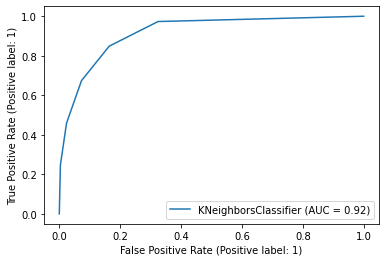

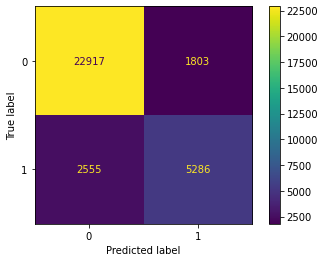

In [ ]:
#Evaluate KNN classifier
print(classification_report(y_test, y_pred_kNN))
scoring(y_pred_kNN)
plotAUCROC(kNNclf, X, y)

##1.4. KNN: Cross-validation

In [ ]:
# KNN Cross-validation

scores_kNN = cross_val_score(kNNclf, X, y, scoring='accuracy',cv=crossval, n_jobs=-1)
result_kNN = mean(scores_kNN)

print(f'10-fold cross validation with kNN results in an accuracy of {round(result_kNN, 3)}')

10-fold cross validation with kNN results in an accuracy of 0.833


#2. Decision tree
2.1. DT: Finding best parameters

In [ ]:
#Decision tree
from sklearn import tree

#parameter testing
#criterion: 'gini''entropy'

criterions=['gini', 'entropy']
def custom_DT(criterion):
  c_DT = tree.DecisionTreeClassifier(criterion=criterion)
  y_pred = customfit(c_DT)
  score_c_DT_train = c_DT.score(X_train, y_train)
  score_c_DT_test = c_DT.score(X_test, y_test)
  print(f'   Accuracy for DT: training set {round(score_c_DT_train, 2)}')
  print(f'   Accuracy for DT: test set {round(score_c_DT_test, 2)}')



for i in criterions:
  print ('\nComputing DT accuracy for for criterion = ',i)
  custom_DT(i)


Computing DT accuracy for for criterion =  gini
   Accuracy for DT: training set 0.97
   Accuracy for DT: test set 0.82

Computing DT accuracy for for criterion =  entropy
   Accuracy for DT: training set 0.97
   Accuracy for DT: test set 0.83


2.2: DT: Defining the classifier

In [ ]:
DTclf = tree.DecisionTreeClassifier(criterion='entropy')
y_pred_DT = customfit(DTclf)

score_DT = DTclf.score(X_test, y_test)
performance.append(('DT', score_DT))
print(f'Accuracy for Decision Tree: {round(score_DT, 3)}')

Accuracy for Decision Tree: 0.827


2.3. DT: Evaluation

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7550
           1       0.62      0.61      0.62      2219

    accuracy                           0.83      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.83      0.83      0.83      9769

Accuracy: 0.83
Balanced Accuracy: 0.75
Sensitivity: 0.61
F1 score: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


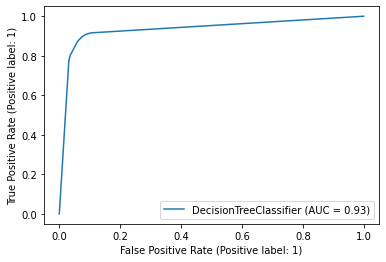

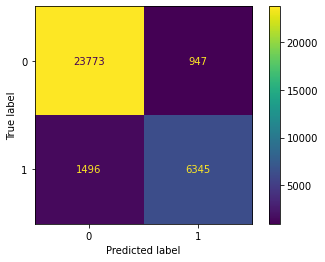

In [ ]:
print(classification_report(y_test, y_pred_DT))
scoring(y_pred_DT)
plotAUCROC(DTclf, X, y)

2.4. DT: Cross-validation

In [ ]:
# apply to Decision Tree

scores_DT = cross_val_score(DTclf, X, y, scoring='accuracy',cv=crossval, n_jobs=-1)
result_DT = mean(scores_DT)

print(f'10-fold cross validation with Decision Tree results in an accuracy of {round(result_DT, 3)}')

10-fold cross validation with Decision Tree results in an accuracy of 0.825


#3. Naive Bayes
3. 1. NB: Finding best parameters

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#parameters=var_smoothing [default=1e-9]
#"A Gaussian curve can serve as a "low pass" filter, allowing only the samples close to its mean to "pass." 
#In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples 
#closer to the distribution mean. This might or might not be appropriate depending if what you want to predict follows a 
#normal distribution.The variable, var_smoothing, artificially adds a user-defined value to the distribution's 
#variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve 
#and accounts for more samples that are further away from the distribution mean." 
#(Source: https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo )

def custom_NB (var_sm):
  c_NB = GaussianNB(var_smoothing=var_sm)
  y_pred= customfit(c_NB)
  score_c_NB_train = c_NB.score(X_train, y_train)
  score_c_NB_test = c_NB.score(X_test, y_test)
  print(f'   Accuracy for NB: training set {round(score_c_NB_train, 2)}')
  print(f'   Accuracy for NB: test set {round(score_c_NB_test, 2)}')


m=1e-13 #1*m=1e-11, 1000*m=1e-8; var_smoothing = 1e=9 (default)
for i in range (20):
  print ('\nComputing NB accuracy for for var_smoothing =',m*10**i)
  custom_NB(m*10**i)

#Best accuracy: var_smoothing=0.1


Computing NB accuracy for for var_smoothing = 1e-13
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1e-12
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1.0000000000000001e-11
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1e-10
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1e-09
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1e-08
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1.0000000000000001e-07
   Accuracy for NB: training set 0.76
   Accuracy for NB: test set 0.76

Computing NB accuracy for for var_smoothing = 1e-06
   Accuracy for NB: training set 0.76


3.2. NB: Defining the classifier

In [ ]:
# https://www.askpython.com/python/examples/naive-bayes-classifier
# try NBs

NBclf = GaussianNB(var_smoothing=0.1)
y_pred_NB = customfit(NBclf)

score_NB = NBclf.score(X_test, y_test)
performance.append(('NB', score_NB))
print(f'Accuracy for Naive Bayes: {round(score_NB, 3)}')

Accuracy for Naive Bayes: 0.832


3.3. NB: Evaluation

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7550
           1       0.69      0.47      0.56      2219

    accuracy                           0.83      9769
   macro avg       0.77      0.70      0.73      9769
weighted avg       0.82      0.83      0.82      9769

Accuracy: 0.83
Balanced Accuracy: 0.7
Sensitivity: 0.47
F1 score: 0.56


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


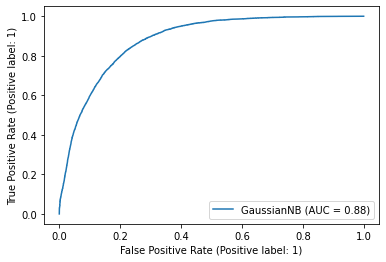

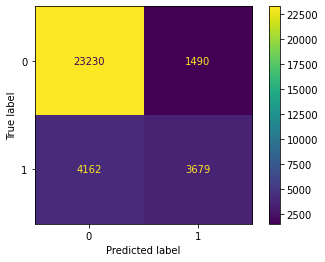

In [ ]:
print(classification_report(y_test, y_pred_NB))
scoring(y_pred_NB)
plotAUCROC(NBclf, X, y)

3.4. NB: Cross-validation

In [ ]:
# apply to Naive Bayes

scores_NB = cross_val_score(NBclf, X, y, scoring='accuracy',cv=crossval, n_jobs=-1)
result_NB = mean(scores_NB)

print(f'10-fold cross validation with Naive Bayes results in an accuracy of {round(result_NB, 3)}')

10-fold cross validation with Naive Bayes results in an accuracy of 0.826


#4. Support vector machine
4.1. SVM: Finding best parameters

In [ ]:
#Support vector machine
from sklearn import svm
#Testing parameters:
#C: - default 1.0
#   - testing for c between 0.5 and 3 (0.5 step)
#kernel - default: 'rbf'
#       - other values: 'linear', 'poly', 'rbf', 'sigmoid'


def custom_svm(c, ker):
  c_SVM=svm.SVC(C=c, kernel=ker) 
  y_pred = customfit(c_SVM)
  score_c_SVM_train = c_SVM.score(X_train, y_train)
  score_c_SVM_test = c_SVM.score(X_test, y_test)
  print(f'   Accuracy for Support Vector Machine: training set {round(score_c_SVM_train, 2)}')
  print(f'   Accuracy for Support Vector Machine: test set {round(score_c_SVM_test, 2)}')

kernels=['linear', 'poly', 'rbf', 'sigmoid']

#for i in range(1, 7):
#  print ('\nComputing SVM accuracy for for c= ',i/2)
#  for j in kernels:
#    print(' Testing kernel = ', j)
#    custom_svm(i/2,j)
#The above code showed that changing C does not influence the accuracy that much. Thus we keep the default C=1
#Due to a high runtime, the above code has been commented out. 
#For demonstration, we show the different accuracy provided by different kernels only for C=1

for j in kernels:
  print(' Testing kernel = ', j)
  custom_svm(1,j)

#The default parameters (c=1, kernel='rbf') produce a high accuracy; other parameters achieved only smaller or equal accuracy.

 Testing kernel =  linear
   Accuracy for Support Vector Machine: training set 0.82
   Accuracy for Support Vector Machine: test set 0.83
 Testing kernel =  poly
   Accuracy for Support Vector Machine: training set 0.84
   Accuracy for Support Vector Machine: test set 0.85
 Testing kernel =  rbf
   Accuracy for Support Vector Machine: training set 0.84
   Accuracy for Support Vector Machine: test set 0.85
 Testing kernel =  sigmoid
   Accuracy for Support Vector Machine: training set 0.62
   Accuracy for Support Vector Machine: test set 0.63


4.2. SVM:Defining the classifier

In [ ]:

# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
# try SVM

SVMclf = svm.SVC()
y_pred_SVM = customfit(SVMclf)

score_SVM = SVMclf.score(X_test, y_test)
performance.append(('SVM', score_SVM))
print(f'Accuracy for Support Vector Machine: {round(score_SVM, 3)}')

Accuracy for Support Vector Machine: 0.85


4.3. SVM: Evaluation

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7550
           1       0.69      0.47      0.56      2219

    accuracy                           0.83      9769
   macro avg       0.77      0.70      0.73      9769
weighted avg       0.82      0.83      0.82      9769

Accuracy: 0.85
Balanced Accuracy: 0.74
Sensitivity: 0.54
F1 score: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


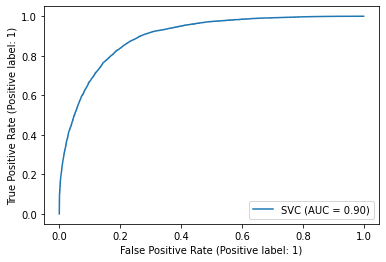

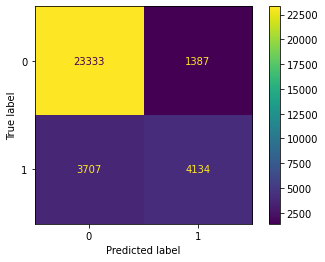

In [ ]:
print(classification_report(y_test, y_pred_NB))
scoring(y_pred_SVM)
plotAUCROC(SVMclf, X, y)

4.4. SVM: Cross-Validation

In [ ]:
#%%script echo skipping 
# apply to Support Vector Machine
# n_jobs = -1 means all processors are used to compute

scores_SVM = cross_val_score(SVMclf, X, y, scoring='accuracy',cv=crossval, n_jobs=-1)
result_SVM = mean(scores_SVM)

print(f'10-fold cross validation with SVM results in an accuracy of {round(result_SVM, 3)}')

10-fold cross validation with SVM results in an accuracy of 0.844


#5 Perceptron
5.1. PER: Finding best parameters

In [ ]:
#Perceptron
from sklearn.linear_model import Perceptron

#Perceptron
#Tuning regularization:
#penalty{‘l2’,’l1’,’elasticnet’}, default=None - The penalty (aka regularization term) to be used.
#alpha, default=0.0001 Constant that multiplies the regularization term if regularization is used.
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

penalties=['l2','l1','elasticnet', None]
alpha=[]
a=0.00001
for i in range(5):
  alpha.append(a*10**i)

def custom_Perceptron (penalty, alpha):
  c_Per = Perceptron(penalty=penalty, alpha=alpha)
  y_pred= customfit(c_Per)
  score_c_Per_train = c_Per.score(X_train, y_train)
  score_c_Per_test = c_Per.score(X_test, y_test)
  print(f'   Accuracy for Perceptron: training set {round(score_c_Per_train, 2)}')
  print(f'   Accuracy for PErceptron: test set {round(score_c_Per_test, 2)}')


for i in penalties:
  print ('\nComputing NB accuracy for penalty =',i)
  for j in alpha:
    print ('\n With alpha=', j)
    custom_Perceptron(i,j)

#Best accuracy: penalty='elasticnet', alpha=0.0001


Computing NB accuracy for penalty = l2

 With alpha= 1e-05
   Accuracy for Perceptron: training set 0.76
   Accuracy for PErceptron: test set 0.78

 With alpha= 0.0001
   Accuracy for Perceptron: training set 0.75
   Accuracy for PErceptron: test set 0.77

 With alpha= 0.001
   Accuracy for Perceptron: training set 0.75
   Accuracy for PErceptron: test set 0.77

 With alpha= 0.01
   Accuracy for Perceptron: training set 0.79
   Accuracy for PErceptron: test set 0.8

 With alpha= 0.1
   Accuracy for Perceptron: training set 0.75
   Accuracy for PErceptron: test set 0.77

Computing NB accuracy for penalty = l1

 With alpha= 1e-05
   Accuracy for Perceptron: training set 0.8
   Accuracy for PErceptron: test set 0.8

 With alpha= 0.0001
   Accuracy for Perceptron: training set 0.79
   Accuracy for PErceptron: test set 0.8

 With alpha= 0.001
   Accuracy for Perceptron: training set 0.75
   Accuracy for PErceptron: test set 0.77

 With alpha= 0.01
   Accuracy for Perceptron: training set 0

5.2. PER: Defining the classifier

In [ ]:
#Defining the Perceptron with best accuracy
Pclf = Perceptron(penalty='elasticnet', alpha=0.0001) 
# Train the perceptron and gain predicted classes
y_pred_P = customfit(Pclf)

score_P = Pclf.score(X_test, y_test)
performance.append(('Perceptron', score_P))
print(f'Accuracy for Perceptron: {round(score_P, 3)}')

Accuracy for Perceptron: 0.822


5.3. PER: Evaluation

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7550
           1       0.60      0.63      0.62      2219

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.83      0.82      0.82      9769

Accuracy: 0.82
Balanced Accuracy: 0.76
Sensitivity: 0.63
F1 score: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


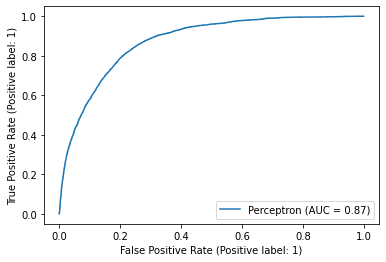

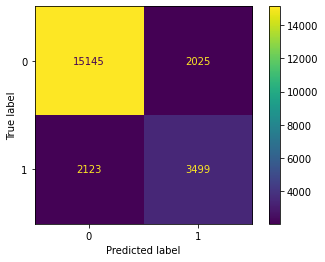

In [ ]:
print(classification_report(y_test, y_pred_P))
scoring(y_pred_P)
plotAUCROC(Pclf, X_train, y_train)

5.4. PER: Cross-Validation

In [ ]:
#Cross Validation

scores_P = cross_val_score(Pclf, X, y, scoring='accuracy',cv=crossval, n_jobs=-1)
result_P = mean(scores_P)

print(f'10-fold cross validation with Perceptron results in an accuracy of {round(result_P, 3)}')

10-fold cross validation with Perceptron results in an accuracy of 0.736


#Performance: Quick Overview, Decision Boundaries

In [ ]:
#In order to properly plot decision boundaries on a 2d space we need 
#to reduce the features of X to 2 dimensions, which will be accomplished 
#using the T-distributed Stochastic Neighbor Embedding. A Voronoi-tasselation 
#of the plane will be used to show the decision boundaries.
#Sources: https://stackoverflow.com/questions/37718347/plotting-decision-boundary-for-high-dimension-data (adapted) and
# https://www.youtube.com/watch?v=eDq8rpv6dAo&t=2042s (adapted)

from sklearn.manifold import TSNE
X_2d = TSNE(n_components=2, learning_rate=200, init='pca').fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
#Creating a list of all classifiers (predictions of X_test) that need to be plotted, along with a list of names (to serve as titles for the plots)
#DCAVEAT: the data in X_test with its predicted values (rather than X_train) will be plotted; 
#Reasons: a more accurate visualisation of the performance of the classifiers due to less data points (this figure not overcrowded)

y_predicted_list=[y_pred_kNN,y_pred_DT, y_pred_NB, y_pred_SVM, y_pred_P]
classifier=['k-nearest neighbours', 'decision-tree', 'naive Bayes', 'support vector machine','perceptron']

In [ ]:

def plot_boundary(i):
  #selecting the predicted dataset:
  y_predicted = y_predicted_list[i]

  #defining the meshgrid containing all the points in the test set:
  xmin=np.min(X_2d[:,0])-1
  xmax=np.max(X_2d[:,0])+1
  x_axis=np.arange(xmin, xmax, round((xmax-xmin)/200,2))
  ymin=np.min(X_2d[:,1])-1
  ymax=np.max(X_2d[:,1])+1
  y_axis=np.arange(ymin, ymax, round((ymax-ymin)/200,2))

  xx, yy = np.meshgrid (x_axis, y_axis)


  #We train a KNN classifier to predict the outcome for every single point in our meshgrid, which will have different colours. 
  #The KNN-classifier will use our predicted outcomes as labels. Thus the meshgrid will be separated into Voronoi cells with one.
  background_model = KNeighborsClassifier(n_neighbors=1).fit(X_2d, y_predicted) 
  voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])  #containes the prediction for every point in the 
  #                                                                             mesh using a knn classifier trained with our prediction values

  voronoiBackground = voronoiBackground.reshape((xx.shape)) #in order to be plottes on a mesh that the shape of xx and yy

  plt.contourf(xx, yy, voronoiBackground, cmap='winter') #plot the mesh with decision boundaries (only coloured areas appear at this point)


  plt.scatter(X_2d[:,0], X_2d[:,1], c=y_test, s=0.9, cmap='binary') #plot the datapoints in X_test and their predictions onto the plot
  plt.title (classifier[i]) #write the name of the classifier
  plt.show()



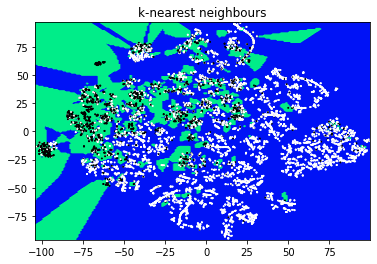

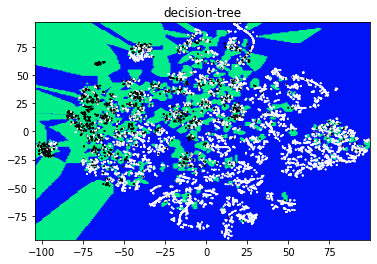

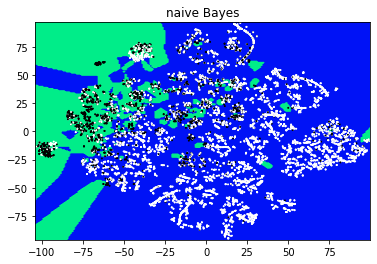

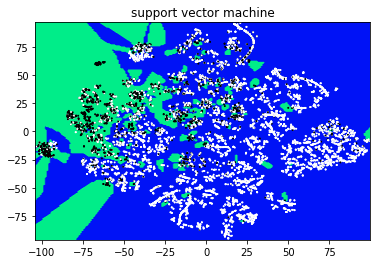

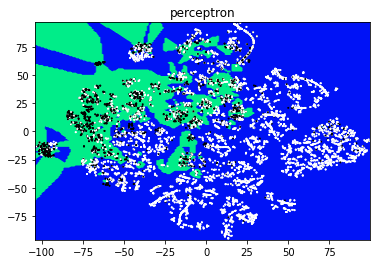

In [ ]:
#Plotting all decision boundaries:

for i in range(5):
  plot_boundary(i) #the function plot_boundary (defined above) will select the i-th element of the y_predicted_list (defined above)
  #the order: ['k-nearest neighbours', 'decision-tree', 'naive Bayes', 'support vector machine','perceptron']

In [ ]:
# overview of the performances
for model, val in performance:
  print(f'{model}: {round(val, 3)}')

kNN: 0.836
DT: 0.827
NB: 0.832
SVM: 0.85
Perceptron: 0.822


#Discriminative behaviour: Dealing with protected attributes

In [ ]:
X_train_new=X_train.drop(columns=['Male','Female'])
X_test_new=X_test.drop(columns=['Male','Female'])


def dist_population(X, y):
  data=pd.DataFrame(columns=['F','income'])
  data['F']=X['Female']
  data['M']=X['Male']
  data['income']=y
  female_population=data[data['F']==1]
  male_population=data[data['M']==1]
  return female_population, male_population

def prob_inc_unbiased (y):
  return sum(y)/len(X_test_new)

In [ ]:
def dist_prob_inc(X, y):
  F, M=dist_population(X,y)
  return len(F[F.income==1])/len(F), len(M[M.income==1])/len(M) 
  #returning the probability of outcome 1 if given female, and prob of outcome 1 if given male

In [ ]:

#Chosen attribute: Sex
#Chosen model: kNN(Reason: second best accuracy after SVM, shorter running time than SVM)


#Statistical Parity:
# Sources: Part 4.2. of    https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb 
#  and     https://www.datacamp.com/community/blog/measuring-bias-in-ml

#Training the classifier with the data with the protected attribute 'sex' removed


#Using the lists defined above (section: decision boundary):
#y_predicted_list=[y_pred_kNN,y_pred_DT, y_pred_NB, y_pred_SVM, y_pred_P] #all the outcomes of our classifiers (data with protected attributes)
#classifier=['k-nearest neighbours', 'decision-tree', 'naive Bayes', 'support vector machine','perceptron'] #names of classifiers
#performance = (model, val) where model = classifier; val= accuracy of the classifier


def protected_clf(clf):
  clf_unbiased=clf
  clf_unbiased.fit(X_train_new, y_train)
  y_pred=clf_unbiased.predict(X_test_new) #y_pred_new = prediction made without using the protected attribute 'sex'
  score_unbiased = clf_unbiased.score(X_test_new, y_test)
  return y_pred, score_unbiased


_knn=KNeighborsClassifier(metric='euclidean',n_neighbors=5)
_dt=tree.DecisionTreeClassifier(criterion='entropy')
_nb=GaussianNB(var_smoothing=0.1)
_svm=svm.SVC()
_per=Perceptron(penalty='elasticnet', alpha=0.0001)  
list_clf=[_knn, _dt, _nb, _svm, _per]


#kNN_unbiased=KNeighborsClassifier(metric='euclidean',n_neighbors=5)
#kNN_unbiased.fit(X_train_new, y_train)
#y_pred_new=kNN_unbiased.predict(X_test_new) #y_pred_new = prediction made without using the protected attribute 'sex'

In [ ]:
print ('The probability of income > 50K in the data:\n - In the training set:', end=' ')
a, b = dist_prob_inc (X_train, y_train)
print ('if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print('   Statistical parity (bias of the training set) = p_f / p_m = ', round(a/b,2))


print ('\n - In the test set:', end=' ')
a, b = dist_prob_inc (X_test, y_test)
print ('if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
print('   Statistical parity (bias of the test set)= p_f / p_m = ', round(a/b,2))


for i in range(5):
  
  print ('\n\nThe probability of predicting an income >50K by ', classifier[i], 'for a datapoint: \n - If protected attributes are used:', end=' ')
  a, b = dist_prob_inc (X_test, y_predicted_list[i])
  print ('if sex=Female : p_f = {:.3%} ; if sex=Male : p_m= {:.3%}'.format(a, b))
  print('   Statistical parity (bias of the classifier)= p_f / p_m = ', round(a/b,2))
  
  y_pred, score_unbiased=protected_clf(list_clf[i])
  (model, val)=performance[i]
  print (' - If protected attributes are not used:', round(prob_inc_unbiased(y_pred), 2))
  print ('Accuracy of the', classifier[i],'classifier: \nwith prottected attribute:',round(val,4),'\nwithout prottected attribute:', round(score_unbiased,4))

The probability of income > 50K in the data:
 - In the training set: if sex=Female : p_f = 11.373% ; if sex=Male : p_m= 31.186%
   Statistical parity (bias of the training set) = p_f / p_m =  0.36

 - In the test set: if sex=Female : p_f = 9.966% ; if sex=Male : p_m= 29.132%
   Statistical parity (bias of the test set)= p_f / p_m =  0.34


The probability of predicting an income >50K by  k-nearest neighbours for a datapoint: 
 - If protected attributes are used: if sex=Female : p_f = 8.254% ; if sex=Male : p_m= 27.562%
   Statistical parity (bias of the classifier)= p_f / p_m =  0.3
 - If protected attributes are not used: 0.21
Accuracy of the k-nearest neighbours classifier: 
with prottected attribute: 0.8362 
without prottected attribute: 0.8349


The probability of predicting an income >50K by  decision-tree for a datapoint: 
 - If protected attributes are used: if sex=Female : p_f = 11.036% ; if sex=Male : p_m= 28.193%
   Statistical parity (bias of the classifier)= p_f / p_m =  0.



##Discriminative behaviour kNN - Interpretation

Since the Statistical Parity of the classifier's prediction is between 0.2 and 0.38, this implies that women have approximately only a third of the chance of getting the same outcome as men. This is mostly due to the bias in the dataset which can be easily 'learned' by the algorithm. In order to avoid this, machine learning algorithms, especially those involved in desicion making or ranking, should not be trained using protected fratures. Nontheless it is worth mentioning that in some rare cases an output that is heavily influenced by biological sex might be desired, for example for algorithms used in medical settings to diagnose sex-specific illnesses (such as prostate cancer).

# Custom kNN Algorithm

In [ ]:
#KNN algorithm 1st implementation

# create shortened data set for implementation to test whether the different steps work without extended runtimes
X_imp = X.head(50)
y_imp = y[:50]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, train_size=0.8, random_state=1)

In [ ]:
from math import sqrt

# check distances between two rows
def distances(row1, row2):
  ncols = len(row1)

  total_dist = 0
  for c in range(ncols):
    total_dist += (row1[c] - row2[c])**2
  
  return sqrt(total_dist)

# example
distances(X.iloc[0,], X.iloc[1,])

3.0919368526612447

In [ ]:
# get list with the k nearest neighbours of a new instance
def neighbours(x_train, test_row, num: int):
  nrows = x_train.shape[0]
  dists = list()

  for xrow in range(nrows):
    # df.values is way faster than df.iloc (I hope)
    dist = distances(x_train.values[xrow,], test_row)
    dists.append((xrow, dist))

  dists.sort(key=lambda tup: tup[1])

  return dists[:5]

# example
nlist = neighbours(X_train_imp, X_test_imp.values[1,], 5)
print(nlist)

[(23, 2.682052891172752), (11, 2.715866740035663), (21, 3.0012028167636244), (38, 3.163127366224683), (7, 3.243478395324887)]


In [ ]:
# predict the class of a new instance
def pred_cls(neigh, y_tr):
  classes = list()

  for entry, dist in neigh:
    #print(y_tr[entry])
    classes.append(y_tr[entry])
  
  return max(set(classes), key=classes.count)

print(f'Predicted class: {pred_cls(nlist, y_train_imp)}')

Predicted class: 0


In [ ]:
# function, which pulls above functions together and returns list of predictions for the test set
def custom_kNN(x_train, y_train, x_test, num):
  nrows = x_test.shape[0]
  pred = list()

  for trow in range(nrows):
    #custom function neighbours, which includes custom function distances
    nlist = neighbours(x_train, x_test.values[trow,], num)
    cls = pred_cls(nlist, y_train)
    pred.append(cls)
  
  return pred

# example
y_pred_imp = custom_kNN(X_train_imp, y_train_imp, X_test_imp, 5)

In [ ]:
# last function to check accuracy of the prediction
def acc_kNN(pred, actual):
  nrows = len(pred)
  count = 0

  for i in range(nrows):
    if pred[i] == actual [i]:
      count += 1
  return count / nrows

#example
print(f'The accuracy of the testrun is {round(acc_kNN(y_pred_imp, y_test_imp), 2)}')

The accuracy of the testrun is 0.9


In [ ]:
# now let's perform it for the whole data set
%%script echo skipping 
# not done after over an hour!!!!
y_pred_whole = custom_kNN(X_train, y_train, X_test, 5)
score = acc_kNN(y_pred_whole, y_test)
print(score)

skipping


In [ ]:
# do it again with numpy array instead

X_implement = X.head(50)
y_implement = y[:50]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_implement, y_implement, train_size=0.8, random_state=1)

X_train_imp = X_train_imp.to_numpy()
X_test_imp = X_test_imp.to_numpy()

In [ ]:
# kNN 2nd implementation using numpy directly

from math import sqrt

# x_train/x_test should be of the type numpy array

# distance function
def distances_np(row1, row2):
  ncols = len(row1)

  total_dist = 0
  for c in range(ncols):
    total_dist += (row1[c] - row2[c])**2
  
  return sqrt(total_dist)

# example
distances_np(X_train_imp[0,], X_test_imp[1,])

# find n nearest neighbours
def neighbours_np(x_train, test_row, num):
  nrows = x_train.shape[0]
  dists = list()

  for xrow in range(nrows):
    dist = distances_np(x_train[xrow,], test_row)
    dists.append((xrow, dist))

  dists.sort(key=lambda tup: tup[1])

  return dists[:5]

# example neighbours list
nlist = neighbours_np(X_train_imp, X_test_imp[1,], 5)

# prediction on label
def pred_cls_np(neigh, y_tr):
  classes = list()

  # get the class of the neighbour from the y_test list. entry is the index of the instance in the dataset
  for entry, dist in neigh:
    classes.append(y_tr[entry])
  
  return max(set(classes), key=classes.count)

# example for prediction of class
print(f'Predicted class: {pred_cls(nlist, y_train_imp)}')

# everything pulled together. a list of predictions for every entry in x_test is returned
def custom_kNN_np(x_train, y_train, x_test, num):
  nrows = x_test.shape[0]
  pred = list()

  for trow in range(nrows):
    #custom function neighbours_np, which includes custom function distances
    nlist = neighbours_np(x_train, x_test[trow,], num)
    cls = pred_cls_np(nlist, y_train)
    #print(cls)
    pred.append(cls)
  
  return pred

# predictions for the shortened data set
y_pred_imp = custom_kNN_np(X_train_imp, y_train_imp, X_test_imp, 5)

# checking accuracy of predictions
def acc_kNN_np(pred, actual):
  nrows = len(pred)
  count = 0

  for i in range(nrows):
    if pred[i] == actual [i]:
      count += 1
  return count / nrows

# accuracy for the shortened data set
print(f'Accuracy: {acc_kNN_np(y_pred_imp, y_test_imp)}')

Predicted class: 0
Accuracy: 0.9


In [ ]:
# performing the changed custom kNN on the whole data set

# the size of the test set is decreased compared to the other tasks to decrease run time. With train_size=0.7 the algorithm took ~1h30min to complete
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1)

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [ ]:
# this took 1h25min to complete and the accuracy was 0.818 with train_size=0.7
# 36 minutes to complete with train_size=0.9 --> Accuracy: 0.831

y_pred_np = custom_kNN_np(X_train_np, y_train, X_test_np, 5)
print(f'Accuracy: {acc_kNN_np(y_pred_np, y_test)}')

Accuracy: 0.8308259134172551


In [ ]:
kNNclf.fit(X_train_np, y_train)
y_pred_lib = kNNclf.predict(X_test)

score_lib = kNNclf.score(X_test_np, y_test)

print(f'Accuracy of the sklearn library function is {round(score_lib, 4)}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy of the sklearn library function is 0.8299
